In [ ]:
#The code below is to combine all the monthly ride data into one dataframe, since I have combined the file already, no need to do this step again.
''' import pandas as pd 

# Define filenames for all months of 2023 and 2024
filenames = [
    f"Bike share ridership 2023-{month:02d}.csv" for month in range(1, 13)
] + [
    f"Bike share ridership 2024-{month:02d}.csv" for month in range(1, 10)
]

# Initialize an empty list to store DataFrames
all_dataframes = []

# Load each file into a DataFrame and append it to the list
for filename in filenames:
    try:
        # Try reading the file with common encodings
        data = pd.read_csv(filename, encoding='utf-8')  # First attempt with utf-8
        print(f"Loaded {filename} with utf-8 encoding.")
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(filename, encoding='latin1')  # Fallback to latin1
            print(f"Loaded {filename} with latin1 encoding.")
        except UnicodeDecodeError:
            data = pd.read_csv(filename, encoding='ISO-8859-1')  # Another fallback
            print(f"Loaded {filename} with ISO-8859-1 encoding.")
    all_dataframes.append(data)

# Combine all DataFrames into a single DataFrame
combined_ridership_data = pd.concat(all_dataframes, ignore_index=True)

# Save the combined DataFrame to a CSV for future use
combined_ridership_data.to_csv("bikeshare_ridership_combined_2023_2024.csv", index=False)

# Display the structure of the combined data
print(combined_ridership_data.info())
print(combined_ridership_data.head()) ###
'''


Loaded Bike share ridership 2023-01.csv with utf-8 encoding.
Loaded Bike share ridership 2023-02.csv with utf-8 encoding.
Loaded Bike share ridership 2023-03.csv with utf-8 encoding.
Loaded Bike share ridership 2023-04.csv with latin1 encoding.
Loaded Bike share ridership 2023-05.csv with latin1 encoding.
Loaded Bike share ridership 2023-06.csv with latin1 encoding.
Loaded Bike share ridership 2023-07.csv with latin1 encoding.
Loaded Bike share ridership 2023-08.csv with latin1 encoding.
Loaded Bike share ridership 2023-09.csv with latin1 encoding.
Loaded Bike share ridership 2023-10.csv with latin1 encoding.
Loaded Bike share ridership 2023-11.csv with latin1 encoding.
Loaded Bike share ridership 2023-12.csv with utf-8 encoding.
Loaded Bike share ridership 2024-01.csv with utf-8 encoding.
Loaded Bike share ridership 2024-02.csv with latin1 encoding.
Loaded Bike share ridership 2024-03.csv with latin1 encoding.
Loaded Bike share ridership 2024-04.csv with latin1 encoding.
Loaded Bike s

In [1]:
import pandas as pd
file_path = "bikeshare_ridership_combined_2023_2024.csv"
combined_ridership_data = pd.read_csv(file_path)

C:\Users\shake\AppData\Local\Temp\ipykernel_32880\1205063317.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_ridership_data = pd.read_csv(file_path)


In [2]:
combined_ridership_data.dtypes

Trip Id                 int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
Model                  object
dtype: object

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Basic trip statistics
print("Total Trips:", combined_ridership_data.shape[0])
print("Average Trip Duration (minutes):", combined_ridership_data['Trip  Duration'].mean() / 60)

# Trip counts by user type
print(combined_ridership_data['User Type'].value_counts())


Total Trips: 11055529
Average Trip Duration (minutes): 17.442535917247078
User Type
Casual Member    10108649
Annual Member      946880
Name: count, dtype: int64


Top Start Stations:
 Start Station Name
York St / Queens Quay W                    83918
Bay St / College St (East Side)            82903
Union Station                              73957
Bay St / Wellesley St W                    70080
Queen St W / John St                       63882
Bay St / Queens Quay W (Ferry Terminal)    63745
Dundas St W / Yonge St                     60874
College Park - Yonge St Entrance           60570
College St / Major St                      59633
Richmond St E / Yonge St                   57803
Name: count, dtype: int64


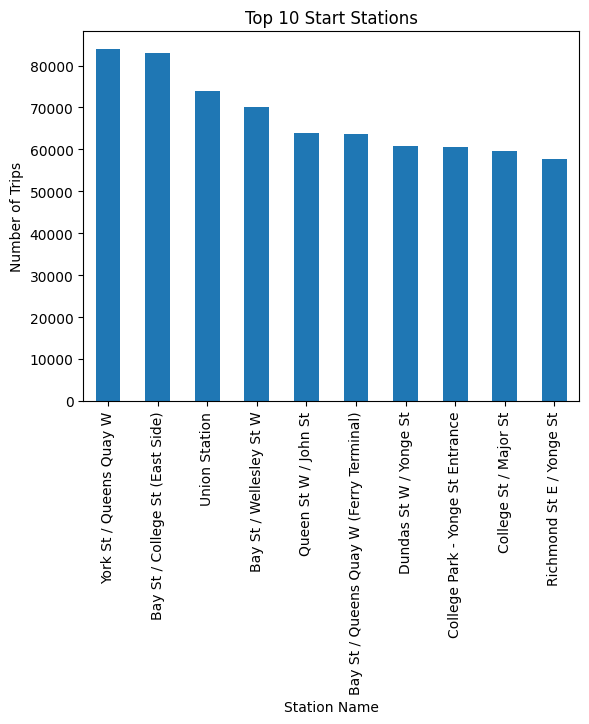

In [5]:
# Most popular start stations
start_station_counts = combined_ridership_data['Start Station Name'].value_counts().head(10)
print("Top Start Stations:\n", start_station_counts)

# Bar plot for top start stations
start_station_counts.plot(kind='bar', title='Top 10 Start Stations', xlabel='Station Name', ylabel='Number of Trips')
plt.show()


In [6]:
# Set visualization styles
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Data Preparation: Extract useful temporal columns
combined_ridership_data['Start Time'] = pd.to_datetime(combined_ridership_data['Start Time'])
combined_ridership_data['End Time'] = pd.to_datetime(combined_ridership_data['End Time'])
combined_ridership_data['Month'] = combined_ridership_data['Start Time'].dt.month
combined_ridership_data['Hour'] = combined_ridership_data['Start Time'].dt.hour
combined_ridership_data['Day of Week'] = combined_ridership_data['Start Time'].dt.day_name()

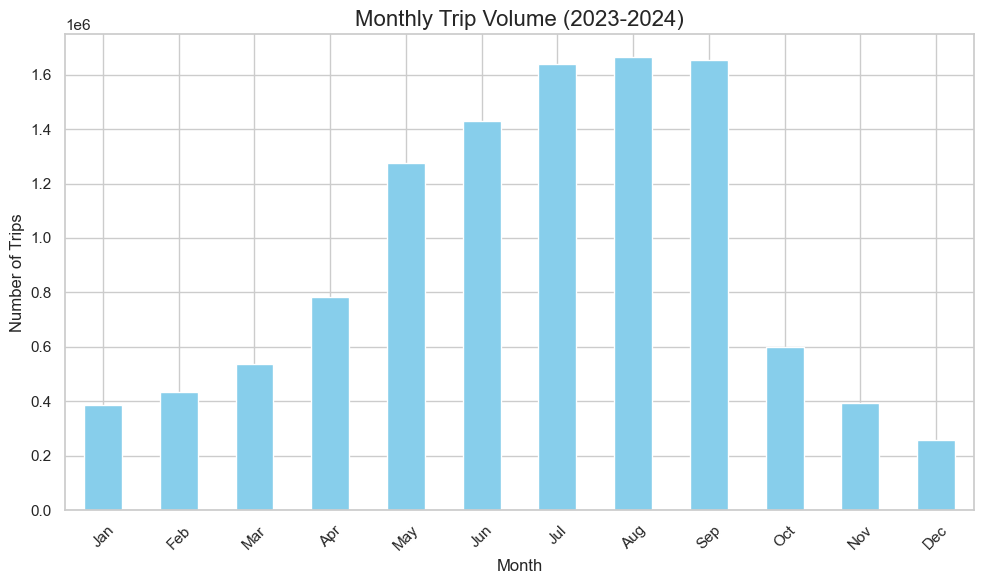

In [7]:
# **1. Monthly Trip Volume**
monthly_trips = combined_ridership_data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_trips.plot(kind='bar', color='skyblue')
plt.title('Monthly Trip Volume (2023-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

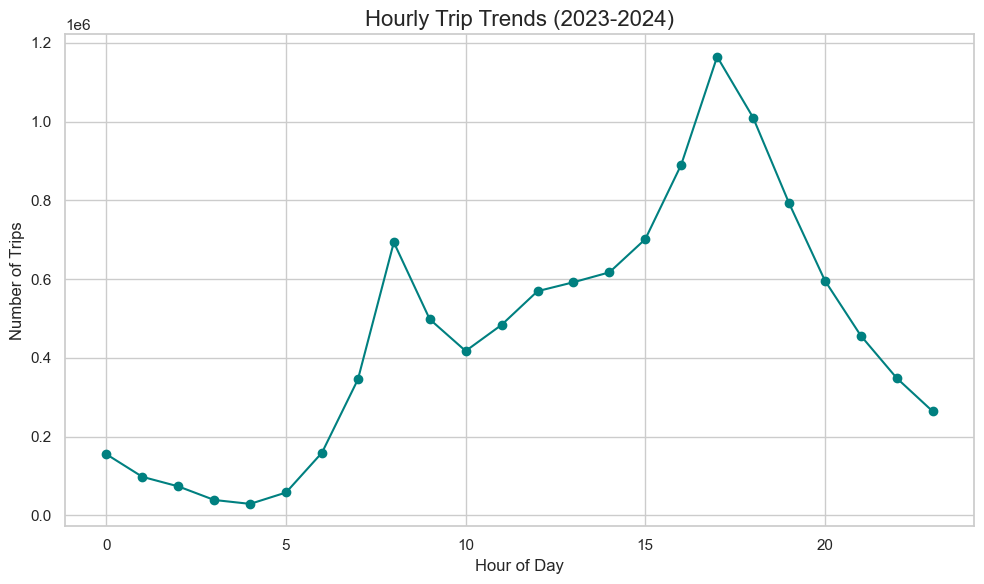

In [8]:
# **2. Hourly Trip Trends**
hourly_trips = combined_ridership_data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='line', marker='o', color='teal')
plt.title('Hourly Trip Trends (2023-2024)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

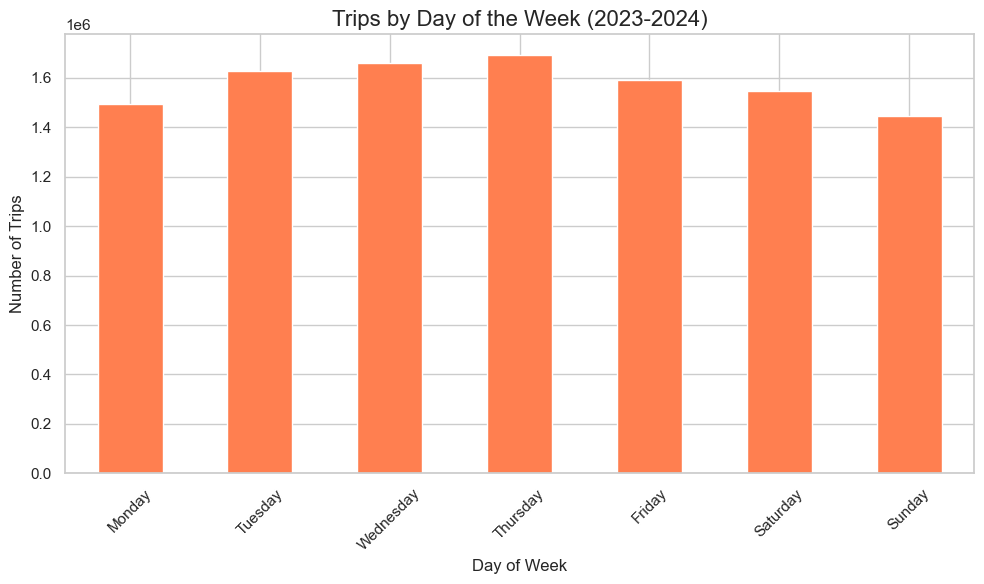

In [9]:
# **3. Day of Week Analysis**
day_of_week_trips = combined_ridership_data['Day of Week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_trips = day_of_week_trips.reindex(day_order)

plt.figure(figsize=(10, 6))
day_of_week_trips.plot(kind='bar', color='coral')
plt.title('Trips by Day of the Week (2023-2024)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

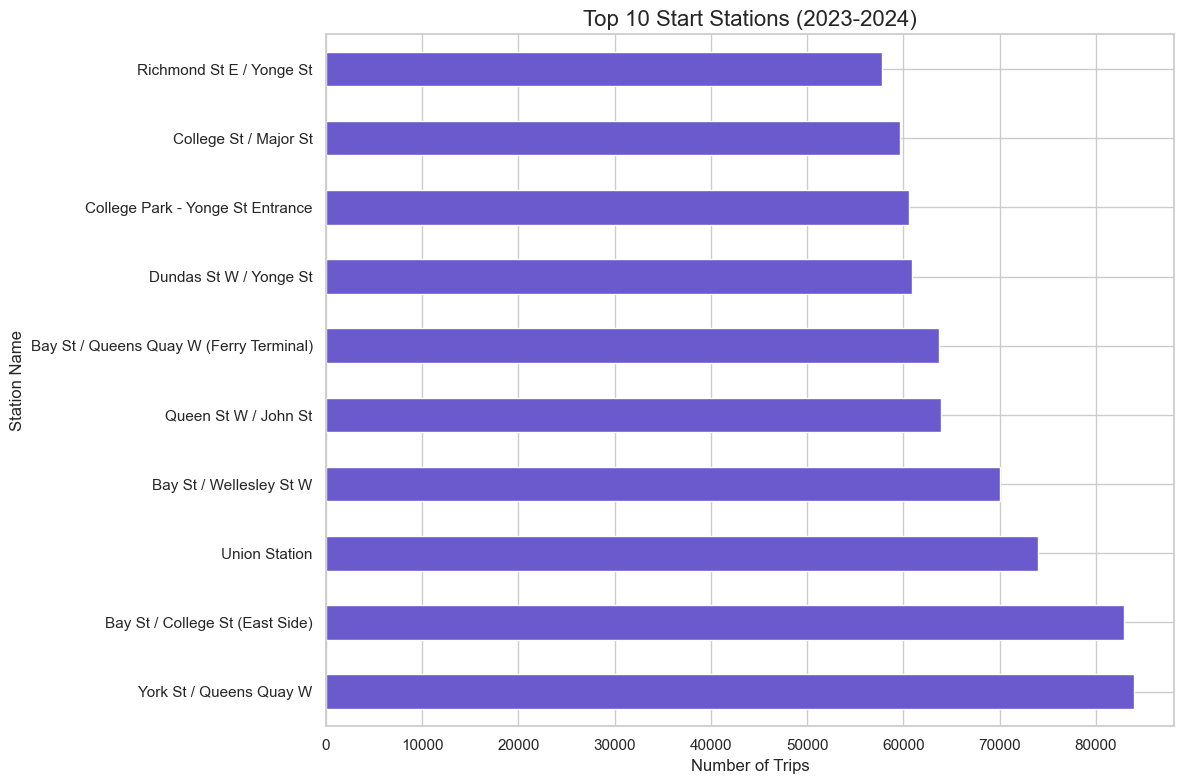

In [10]:
# **4. Top 10 Start Stations**
top_start_stations = combined_ridership_data['Start Station Name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_start_stations.plot(kind='barh', color='slateblue')
plt.title('Top 10 Start Stations (2023-2024)', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Station Name', fontsize=12)
plt.tight_layout()
plt.show()

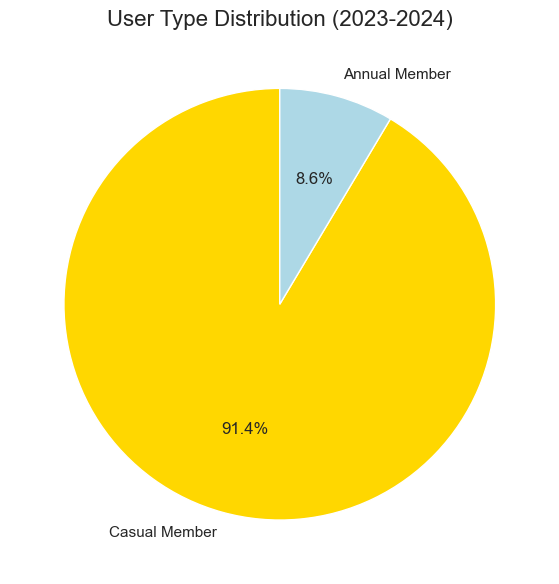

In [11]:
# **5. User Type Distribution**
user_type_counts = combined_ridership_data['User Type'].value_counts()
plt.figure(figsize=(8, 6))
user_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('User Type Distribution (2023-2024)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

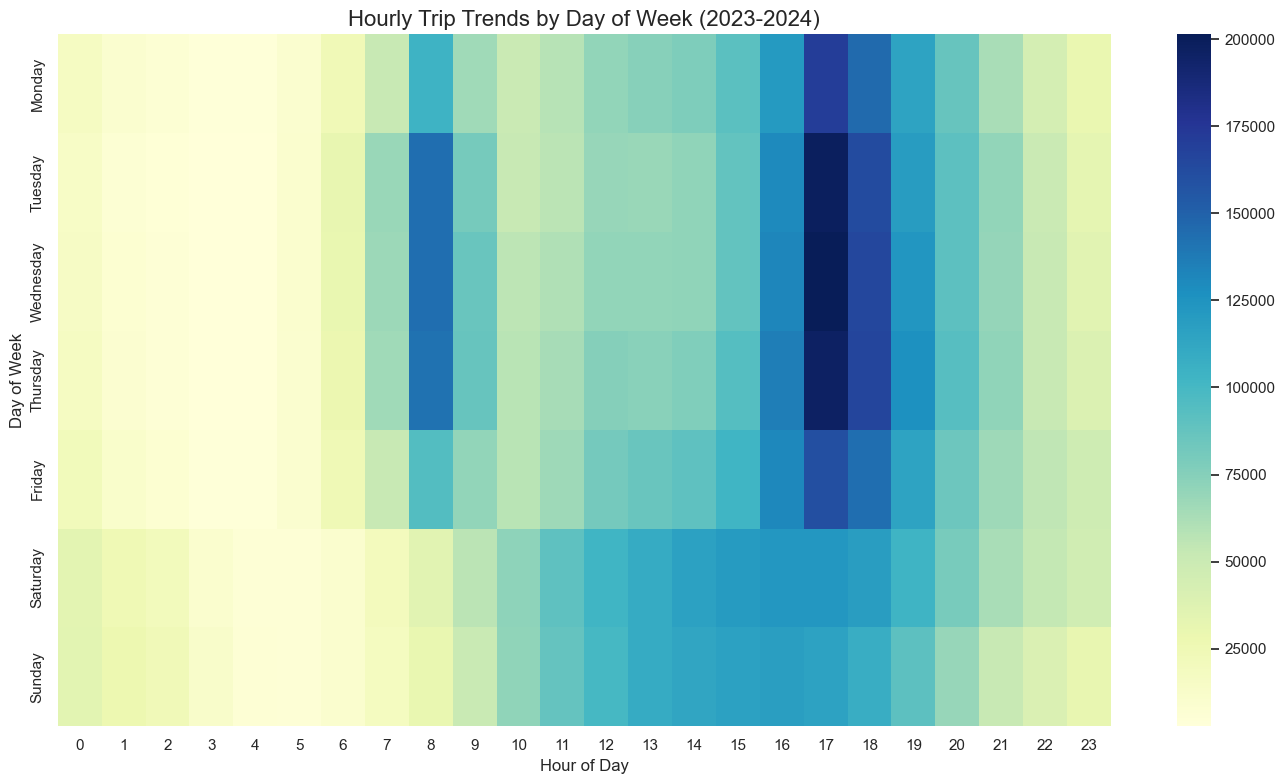

In [12]:

# **6. Heatmap: Hourly Trends by Day**
hour_day_pivot = combined_ridership_data.pivot_table(index='Day of Week', columns='Hour', values='Trip Id', aggfunc='count', fill_value=0)
hour_day_pivot = hour_day_pivot.reindex(day_order)

plt.figure(figsize=(14, 8))
sns.heatmap(hour_day_pivot, cmap='YlGnBu', cbar=True)
plt.title('Hourly Trip Trends by Day of Week (2023-2024)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

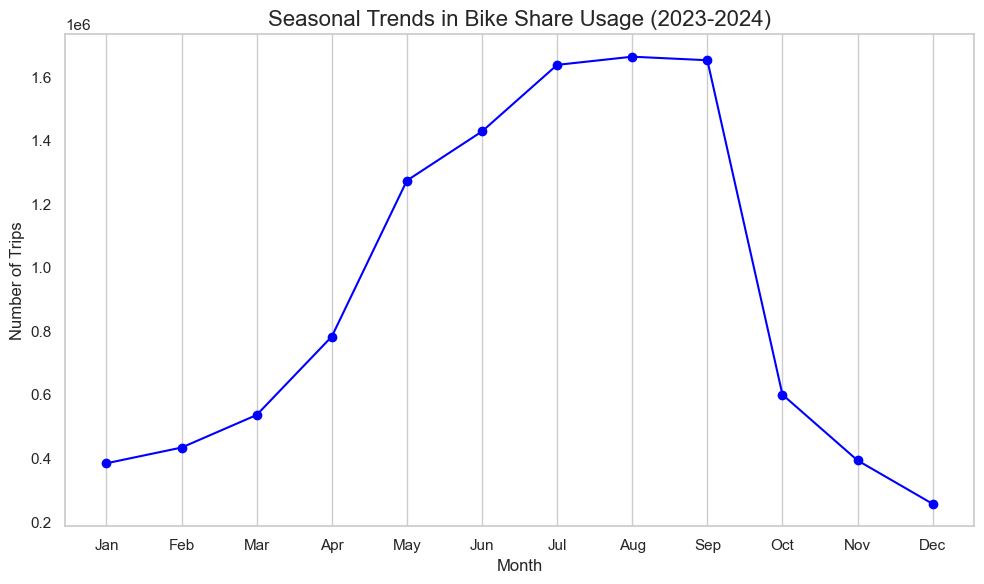

C:\Users\shake\AppData\Local\Temp\ipykernel_32880\1265723914.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\shake\AppData\Local\Temp\ipykernel_32880\1265723914.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


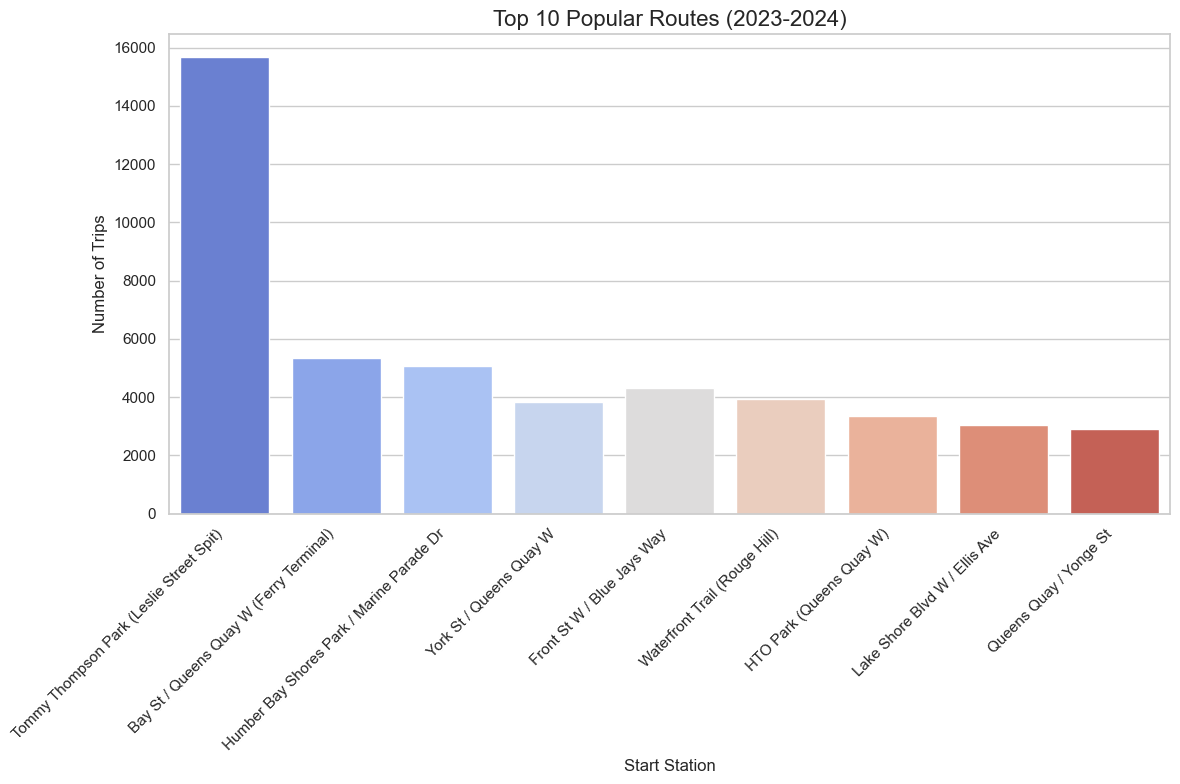

In [13]:
# 1. Seasonal Trends Visualization
# Aggregate trips by month across all years
monthly_trends = combined_ridership_data.groupby('Month').size()

# Plot Seasonal Trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Seasonal Trends in Bike Share Usage (2023-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Most Popular Routes Visualization
# Find the top 10 start and end station combinations
popular_routes = (
    combined_ridership_data
    .groupby(['Start Station Name', 'End Station Name'])
    .size()
    .reset_index(name='Trips')
    .sort_values(by='Trips', ascending=False)
    .head(10)
)

# Plot Most Popular Routes
plt.figure(figsize=(12, 8))
sns.barplot(
    data=popular_routes,
    y='Trips',
    x='Start Station Name',
    palette='coolwarm',
    ci=None
)
plt.title('Top 10 Popular Routes (2023-2024)', fontsize=16)
plt.xlabel('Start Station', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()